<a href="https://colab.research.google.com/github/c-bujari/CAP4630/blob/master/HW_2/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework Assignment 2
###CAP 4630 Artificial Intelligience
####Clyde Bujari

##Problem 1
Find three simple bivariate functions f1, f2, and f3, and three points p1, p2, p3 such that:
* p1 is a minimum of f1
* p2 is a maximum of f2
* p3 is neither a minimum nor maximum of f3, but the gradient of f3 at p3 is the zero vector

Use (a) three-dimensional plots as in [three_dimensional_plotting.ipynb](https://colab.research.google.com/drive/1btvbObh-nZ4MSC7QkjpS3RGpefN_msth), as well as (b) density plots and (c) contour plots as in [density_and_contour_plots.ipynb](https://colab.research.google.com/drive/1pcvtvK6jITbp1Sf2nD2uEaDGpwUOA3IL). Indicate clearly the points p1, p2, and p3 in all plots.


### Setup of functions and points

In [0]:
# Formula for a 3D parabola (?) with vertex at (0, 0, 0)
# f1(x, y) = x^2 + y^2
def f1(x, y):
  return (x**2+y**2) 

# Formula for a cone with vertex at (1, 1, 0)
# f2(x, y) = -1 * sqrt(x^2 + y^2)
def f2(x, y):
  return -1 * (x**2+y**2)**0.5

# 3rd order graph, has gradient = the zero vector at (0, 0) but no min/max
# f3(x, y) = 3x^3 + 2y^3
def f3(x, y):
  return (3*(x**3) +2*(y**3))

p1 = (0, 0)
p2 = (0, 0)
p3 = (0, 0)

### Common initialization for all plots

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### (a) Three-Dimensional Plotting

In [0]:
## (a) Three-dimensional plotting
# Enable mplot3d toolkit
from mpl_toolkits import mplot3d

# func = function to plot
# point = point to plot
# runnumber = simply allows us to label as f1, f2, p1, p2, etc.
# There are better ways to do this, but im going for quick and dirty
def graph3d(func, point, runnumber):
  # Set graph bounds
  x = np.linspace(-6, 6, 30)
  y = np.linspace(-6, 6, 30)

  # Use np.meshgrid() to create a 2d grid from x and y
  X, Y = np.meshgrid(x, y)

  # Set all Z values = func(X, Y)
  Z = func(X, Y)

  fig = plt.figure()
  ax = plt.axes(projection='3d')
  # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
  # ax.set_title('surface');
  ax.contour3D(X, Y, Z, 50, cmap='Greens')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z');

  ax.plot([point[0]], [point[1]], 'bo')
  ax.annotate("p" + str(runnumber) + ": (" + str(point[0]) + ", " + str(point[1]) + ")", point)

  ax.view_init(60, 35)

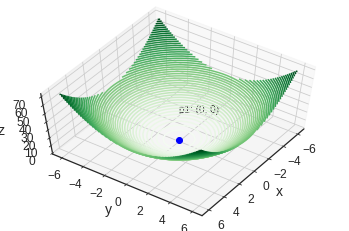

In [265]:
graph3d(f1, p1, 1)

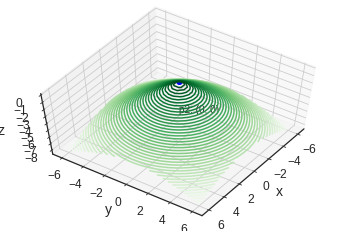

In [266]:
graph3d(f2, p2, 2)

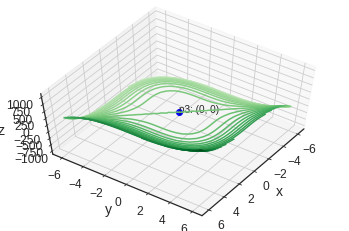

In [267]:
graph3d(f3, p3, 3)
## NOTE: matplotlib will scale this graph very differently from the others,
## as it is continuing into infinity.
## I have decided to leave it as default to make p3 easy to see.

### (b) Density Plotting
Density plotting was never explicitely addressed in [density_and_contour_plots.ipynb](https://colab.research.google.com/drive/1pcvtvK6jITbp1Sf2nD2uEaDGpwUOA3IL)...I am assuming that it is the same as contour plotting.

### (c) Contour Plotting

In [0]:
plt.style.use('seaborn-white')

# Function inputs the same as for graph3d()
def contour(func, point, runnumber):
  x = np.linspace(-10, 10, 50)
  y = np.linspace(-10, 10, 40)

  X, Y = np.meshgrid(x, y)
  Z = func(X, Y)

  plt.contour(X, Y, Z, colors='green');
  plt.plot(point[0], point[1], 'bo')
  plt.annotate("p" + str(runnumber) + ": (" + str(point[0]) + ", " + str(point[1]) + ")", point)

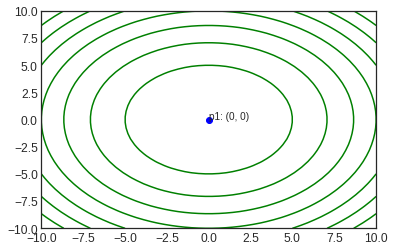

In [269]:
contour(f1, p1, 1)

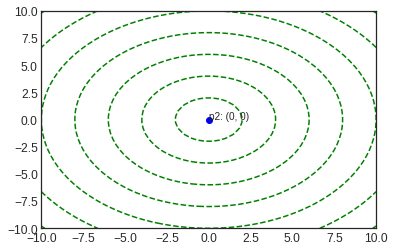

In [270]:
contour(f2, p2, 2)

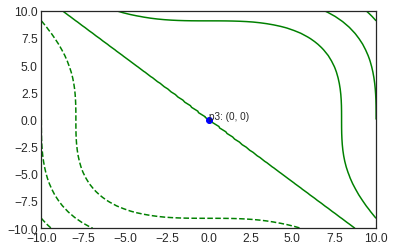

In [271]:
contour(f3, p3, 3)

## Problem 2
Extend the code for mini-batch gradient descent in the notebook [linear_regression_gradient_descent.ipynb](https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-) to the case $n = 2$; that is, the model parameters are the two weights, w1 and w2, and the bias term b (You can remove the code for batch-gradient descent and stochastic gradient descent). Make sure that your code is vectorized.

To solve this problem, you have to create data points that approximately lie on a 2D plane, display these points, and display the predictions of your model after tuning the parameters with gradient descent.

### Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Generate random data

In [0]:
# generate m random pairs (x, y)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

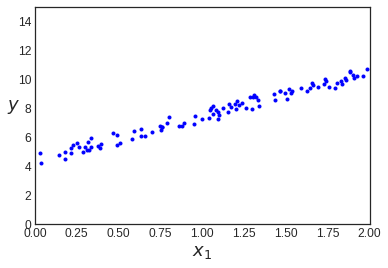

In [274]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [275]:
print(X.shape)

(100, 1)


In [276]:
# show the first 5 rows
print(X[:5, :])

[[1.06448998]
 [0.25148302]
 [0.26542931]
 [0.28708472]
 [1.87963958]]


### Combine bias $b=w_0$ and weights $w_1, w_2$



Linear regression predicts $\hat{y}=b + w_1 x_1 + w_2 x_2$. It will be convenient to rewrite this as a dot product.  Define $w=(w_0, w_1, w_2)$ and $x=(1, x_1, x_2)$.  Then, we have $\hat{y}=w \boldsymbol{\cdot} x$.

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X])

In [278]:
print(X_b.shape)

(100, 2)


In [279]:
# show the first 5 rows
print(X_b[:5, :])

[[1.         1.06448998]
 [1.         0.25148302]
 [1.         0.26542931]
 [1.         0.28708472]
 [1.         1.87963958]]


In [0]:
# create array with x1=0 and x1=2
# NEW: Added on x2 = 3? this...seems too easy to be all that was needed?
X_new = np.array([[0], [2], [3]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((3, 1)), X_new])

In [281]:
print(X_new_b)

[[1. 0.]
 [1. 2.]
 [1. 3.]]


### Linear regression using mini-batch gradient descent
A few training examples are selected to compute the gradient.

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# Randomly generate initial weight
np.random.seed(42)
initial_weight = np.random.randn(2, 1) 

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

In [284]:
weight_path_mgd[-1]

array([[4.00334798],
       [3.40135069]])

In [0]:
weight_path_mgd = np.array(weight_path_mgd)

### Plot the Mini-Batch Descent

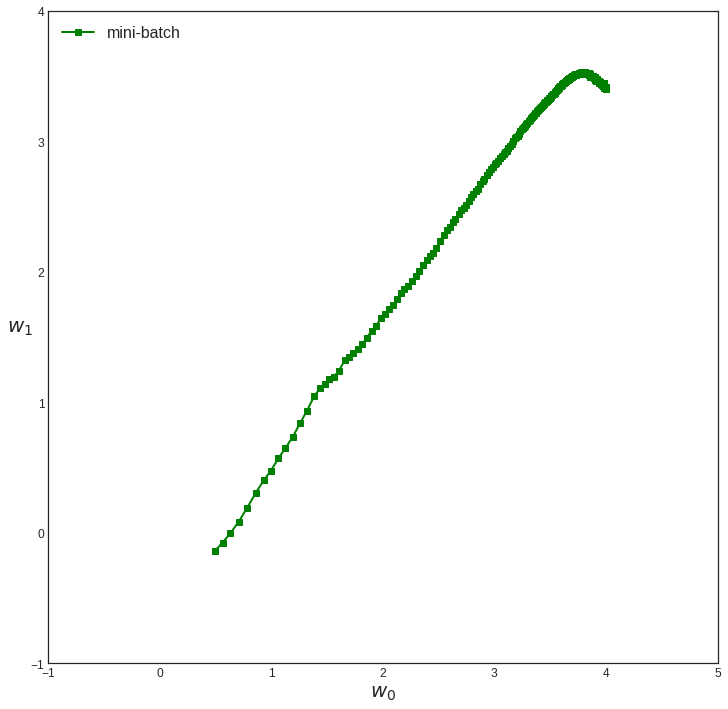

In [286]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([-1, 5, -1, 4])
plt.show()

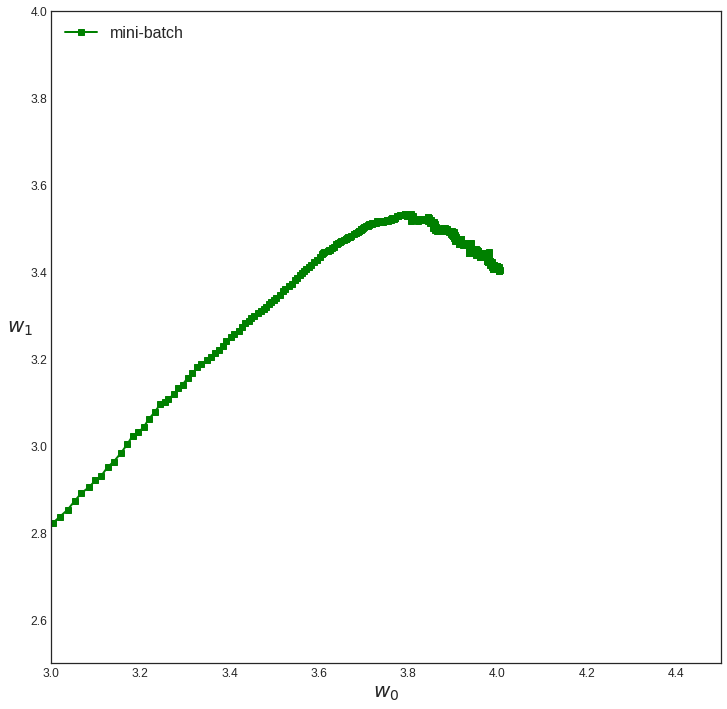

In [287]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([3, 4.5, 2.5, 4])
plt.show()

##Problem 3
What does an average MNIST digit look like?
For each $i = 0, 1, 2,..., 9$, compute the average of digit $i$ and display it.

More precisely, you have to add all the images of the digit $i$ together and divide by the number of times the digit $i$ occurs in the dataset.

Use `tf.keras.datasets` to load the MNIST digits dataset.

In [288]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

mnist = tf.keras.datasets.mnist

train_data, test_data = mnist.load_data()

train_images_original, train_labels_original = train_data
test_images_original, test_labels_original = test_data

TensorFlow 2.x selected.
11493376/11490434 [==============================] - 0s 0us/step
